# Exploratory Data Analysis

Chapter 2, Lesson 1

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='talk')

import utils
from utils import decorate
from distribution import Pmf, Cdf

## Loading and validation

Reading data from the [General Social Survey](https://gssdataexplorer.norc.org/projects/29853)

TODO: Add link to project

In [2]:
# Would be nice if this worked, but it doesn't
# df = pd.read_excel('data/GSS.xls')

In [3]:
# Would be nice if this worked, but it doesn't
# df = pd.read_stata('data/GSS.dat')

In [4]:
gss = utils.read_stata('data')
print(gss.shape)
gss.head()

(62466, 24)


,year,gun,gunage,gunnum,owngun,rowngun,realinc,conrinc,hispanic,cohort,...,age,educ,sex,race,income,rincome,srcbelt,polviews,natcrime,wtssall
0,1972,0,0,0,0,0,18951.0,0.0,0,1949,...,23,16,2,1,0,0,3,0,0,0.4446
1,1972,0,0,0,0,0,24366.0,0.0,0,1902,...,70,10,1,1,0,0,3,0,0,0.8893
2,1972,0,0,0,0,0,24366.0,0.0,0,1924,...,48,12,2,1,0,0,3,0,0,0.8893
3,1972,0,0,0,0,0,30458.0,0.0,0,1945,...,27,17,2,1,0,0,3,0,0,0.8893
4,1972,0,0,0,0,0,50763.0,0.0,0,1911,...,61,12,2,1,0,0,3,0,0,0.8893


In [5]:
def replace_invalid(df):
    df.gunlaw.replace([8, 9, 0], np.nan, inplace=True)
    df.owngun.replace([3, 8, 9, 0], np.nan, inplace=True)
    df.gun.replace([8, 9, 0], np.nan, inplace=True)
    df.natcrime.replace([8, 9, 0], np.nan, inplace=True)
    df.income.replace([0, 13, 98, 99], np.nan, inplace=True)
    df.realinc.replace([0], np.nan, inplace=True)                  # TODO: check this
    df.educ.replace([98,99], np.nan, inplace=True)
    df.polviews.replace([8, 9, 0], np.nan, inplace=True)
    df.age.replace([98, 99], np.nan, inplace=True)               # 89 means 89 or older
    df.hispanic.replace([98, 99, 0], np.nan, inplace=True)
    df.cohort.replace([9999], np.nan, inplace=True)

In [6]:
def numnull(series):
    return sum(series.isnull())

In [7]:
replace_invalid(gss)

In [8]:
sample = utils.resample_by_year(gss)
sample.shape

(62466, 24)

### Age 

https://gssdataexplorer.norc.org/projects/29853/variables/53/vshow

In [9]:
numnull(gss.age)

221

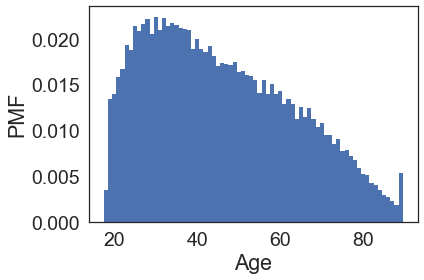

In [10]:
pmf = Pmf.from_seq(gss.age)
pmf.bar(width=1)
decorate(xlabel='Age', ylabel='PMF')

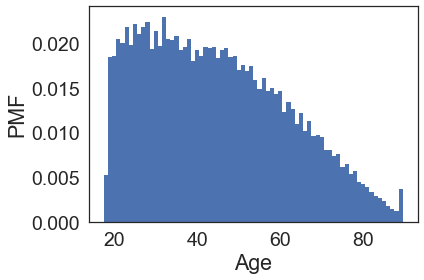

In [11]:
pmf = Pmf.from_seq(sample.age)
pmf.bar(width=1)
decorate(xlabel='Age', ylabel='PMF')

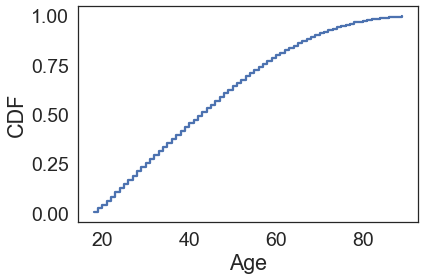

In [12]:
cdf = Cdf.from_seq(sample.age)
cdf.step()
decorate(xlabel='Age', ylabel='CDF')

In [13]:
cdf(51)

array(0.65935069)

In [15]:
cdf.inverse(0.5)

array(43.)

In [14]:
stop

NameError: name 'stop' is not defined

### Year of birth 

https://gssdataexplorer.norc.org/projects/29853/variables/5507/vshow

In [ ]:
numnull(gss.cohort)

In [ ]:
thinkplot.Cdf(thinkstats2.Cdf(gss.cohort))
thinkplot.Config(xlabel='Year of birth', ylabel='CDF')

### Sex 

https://gssdataexplorer.norc.org/projects/41723/variables/81/vshow

In [ ]:
numnull(gss.sex)

In [ ]:
utils.values(gss, 'sex')

### Race

https://gssdataexplorer.norc.org/projects/41723/variables/82/vshow

CODE WITHOUT ASKING ONLY IF THERE IS NO DOUBT IN YOUR MIND. 
What race do you consider yourself? RECORD VERBATIM AND CODE.

In [ ]:
numnull(gss.race)

In [ ]:
utils.values(gss, 'race')

### Hispanic 



In [ ]:
numnull(gss.hispanic)

In [ ]:
utils.values(gss, 'hispanic')

### srcbelt

C. SRC (SURVEY RESEARCH CENTER, UNIVERSITY OF MICHIGAN) NEW BELT CODE

https://gssdataexplorer.norc.org/projects/41723/variables/121/vshow

In [ ]:
numnull(gss.srcbelt)

In [ ]:
utils.values(gss, 'srcbelt')

### Make age and cohort groups

Group people into 5- and 10-year bins by birth year.

In [ ]:
gss['cohort5'] = utils.RoundIntoBins(gss, 'cohort', 5, low=2) + 2.5

In [ ]:
grouped_cohort = gss.groupby(['cohort5'])
counts = grouped_cohort.gunlaw.count()           # count cases where we have the dependent var
counts

To avoid a final data point with a small sample size, I chose `low` to minimize the number of people in the last group, and I've lumped them in with the previous group.

In [ ]:
gss.loc[gss.cohort5==1999.5, 'cohort5'] = 1994.5
gss.loc[gss.cohort5<1894, 'cohort5'] = 1894.5

In [ ]:
grouped_cohort = gss.groupby(['cohort5'])
counts = grouped_cohort.gunlaw.count()
counts

In [ ]:
gss['cohort10'] = utils.RoundIntoBins(gss, 'cohort', 10)

In [ ]:
grouped_cohort = gss.groupby(['cohort10'])
counts = grouped_cohort.gunlaw.count()
counts

Here's the number of respondents in each year.

In [ ]:
utils.values(gss, 'year')

Group into 4 year intervals, chosen to get 2014 and 2016 into the last bin.

In [ ]:
gss['year4'] = utils.RoundIntoBins(gss, 'year', 4, low=1970) + 1
utils.values(gss, 'year4')

Group people into 5 and 3-year age groups.

In [ ]:
gss['age5'] = utils.RoundIntoBins(gss, 'age', 5) + 2.5
utils.values(gss, 'age5')

In [ ]:
gss['age3'] = utils.RoundIntoBins(gss, 'age', 3, low=0) + 1.5
utils.values(gss, 'age3')

### Make booleans

In [ ]:
def copy_nan(df, varname, newvar):
    df.loc[df[varname].isnull(), newvar] = np.nan

In [ ]:
def make_boolean(df, varname, values, newvar):
    """Make a boolean variable.
    
    df: DataFrame
    varname: name of base variable
    values: sequence of values for varname
    newvar: name of new variable (recode)
    """
    #assert numnull(df[varname]) == 0
    df[newvar] = df[varname].isin(values)
    copy_nan(df, varname, newvar)

In [ ]:
def make_booleans(df):
    df['cohort10'] = utils.RoundIntoBins(df, 'cohort', 10)
    make_boolean(df, 'cohort10', [1920], 'twenties')
    make_boolean(df, 'cohort10', [1930], 'thirties')
    make_boolean(df, 'cohort10', [1940], 'forties')
    make_boolean(df, 'cohort10', [1950], 'fifties')
    make_boolean(df, 'cohort10', [1960], 'sixties')
    make_boolean(df, 'cohort10', [1970], 'seventies')
    make_boolean(df, 'cohort10', [1980], 'eighties')
    make_boolean(df, 'cohort10', [1990], 'nineties')
    make_boolean(df, 'gunlaw', [1.0], 'favor')
    make_boolean(df, 'owngun', [1.0], 'gunhome')
    make_boolean(df, 'gun', [1.0], 'threatened')
    make_boolean(df, 'natcrime', [1.0], 'spendcrime')
    make_boolean(df, 'income', [12], 'topincome')
    make_boolean(df, 'income', [1,2,3,4,5,6,7,8], 'lowincome')
    make_boolean(df, 'polviews', [1,2,3], 'liberal')
    make_boolean(df, 'polviews', [4], 'moderate')
    make_boolean(df, 'polviews', [6,7,8], 'conservative')
    make_boolean(df, 'sex', [2], 'female')
    make_boolean(df, 'hispanic', [2], 'ishisp')
    make_boolean(df, 'race', [2], 'black')
    make_boolean(df, 'race', [3], 'otherrace')
    make_boolean(df, 'srcbelt', [1,2,5], 'urban')
    make_boolean(df, 'srcbelt', [3,4], 'suburban')
    make_boolean(df, 'srcbelt', [6], 'rural')

    df['college'] = df['educ'] >= 13 
    copy_nan(df, 'educ', 'college')
    
    per25 = df['realinc'].quantile(0.25)
    df['lowrealinc'] = df['realinc'] <= per25 
    copy_nan(df, 'realinc', 'lowrealinc')

    per75 = df['realinc'].quantile(0.75)
    df['highrealinc'] = df['realinc'] >= per75 
    copy_nan(df, 'realinc', 'highrealinc')

make_booleans(gss)

### Resample

In [ ]:
sample = utils.ResampleByYear(gss).copy()
sample.shape

In [ ]:
utils.values(sample, 'twenties')

In [ ]:
utils.values(sample, 'thirties')

In [ ]:
utils.values(sample, 'forties')

In [ ]:
utils.values(sample, 'fifties')

In [ ]:
utils.values(sample, 'sixties')

In [ ]:
utils.values(sample, 'seventies')

In [ ]:
utils.values(sample, 'eighties')

In [ ]:
utils.values(sample, 'nineties')

In [ ]:
utils.values(sample, 'favor')

In [ ]:
utils.values(sample, 'gunhome')

In [ ]:
utils.values(sample, 'threatened')

In [ ]:
utils.values(sample, 'spendcrime')

In [ ]:
utils.values(sample, 'topincome')

In [ ]:
utils.values(sample, 'lowincome')

In [ ]:
utils.values(sample, 'lowrealinc')

In [ ]:
utils.values(sample, 'highrealinc')

In [ ]:
utils.values(sample, 'liberal')

In [ ]:
utils.values(sample, 'moderate')

In [ ]:
utils.values(sample, 'conservative')

In [ ]:
utils.values(sample, 'female')

In [ ]:
utils.values(sample, 'ishisp')

In [ ]:
utils.values(sample, 'black')

In [ ]:
utils.values(sample, 'otherrace')

In [ ]:
utils.values(sample, 'urban')

In [ ]:
utils.values(sample, 'suburban')

In [ ]:
utils.values(sample, 'rural')

In [ ]:
utils.values(sample, 'college')

### Look at trends

In [ ]:
def plot_series(grouped, varname, **options):
    series = grouped[varname].mean() * 100
    thinkplot.plot(series.dropna(), **options, label=varname)
    thinkplot.config(xlabel='Year of survey', 
                     ylabel='Percent',
                     xlim=[1971, 2017])

In [ ]:
grouped_year4 = sample.groupby('year4')

In [ ]:
plot_series(grouped_year4, 'nineties')
plot_series(grouped_year4, 'eighties')
plot_series(grouped_year4, 'seventies')
plot_series(grouped_year4, 'sixties')
plot_series(grouped_year4, 'fifties')

In [ ]:
plot_series(grouped_year4, 'female')
plot_series(grouped_year4, 'black')
plot_series(grouped_year4, 'otherrace')
plot_series(grouped_year4, 'ishisp')

In [ ]:
plot_series(grouped_year4, 'liberal')
plot_series(grouped_year4, 'conservative')

In [ ]:
plot_series(grouped_year4, 'highrealinc')
plot_series(grouped_year4, 'lowrealinc')

In [ ]:
plot_series(grouped_year4, 'urban')
plot_series(grouped_year4, 'rural')

In [ ]:
plot_series(grouped_year4, 'college')
plot_series(grouped_year4, 'threatened')
plot_series(grouped_year4, 'gunhome')

### Fill missing values

In [ ]:
def fill_missing_column(df, colname):
    """Fills missing values of the given column.

    df: DataFrame
    colname: string
    """
    null = df[df[colname].isnull()]

    print(colname, len(null))

    valid = df[colname].dropna()
    fill = valid.sample(len(null), replace=True)
    fill.index = null.index

    df[colname].fillna(fill, inplace=True)

In [ ]:
def fill_age(df):
    """Fills age based on year and cohort.
    
    df: DataFrame
    """
    colname = 'age'
    null = df[df[colname].isnull()]

    print('age', len(null))
    
    fill = df.year - df.cohort

    df[colname].fillna(fill, inplace=True)

In [ ]:
def fill_all_missing(df):
    varnames = ['year', 'cohort', 'owngun', 'gun', 'natcrime', 'income', 'realinc', 'educ',
                'polviews', 'sex', 'race', 'hispanic', 'srcbelt']
    for varname in varnames:
        fill_missing_column(df, varname)
    fill_age(df)

In [ ]:
fill_all_missing(sample)

After filling, we have to make booleans again.

In [ ]:
make_booleans(sample)

### Center cohort, age, and year.

In [ ]:
def center_factors(df):
    """Center factors around their means.
    
    Add centered factors to make the coeffients
    of the model easier to interpret.
    
    df: DataFrame
    """
    df['ones'] = np.ones_like(df.cohort)
    df['c'] = df.cohort - 1966
    df['a'] = df.age - 47
    df['y'] = df.year - 1990
    
    # also add quadratic factors and interaction term
    df['c2'] = df.c**2
    df['a2'] = df.a**2
    df['y2'] = df.y**2
    df['y3'] = df.y**3
    df['ac'] = df.a * df.c

In [ ]:
center_factors(sample)

### Run logistic models



Drop records if we don't have the dependent variable.

In [ ]:
subset = sample.dropna(subset=['gunlaw'])
subset.shape

How many records did we lose?

In [ ]:
sample.shape[0] - subset.shape[0]

In [ ]:
subset.head()

In [ ]:
sample.columns

In [ ]:
varnames = ['nineties', 'eighties', 'seventies', 'fifties', 'forties', 'thirties', 'twenties',
            'female', 'black', 'otherrace', 'ishisp', 'conservative', 'liberal', 'lowrealinc', 'highrealinc',
            'college', 'urban', 'rural', 'threatened', 'gunhome']

all_varnames = varnames + ['y', 'y2', 'y3', 'favor']

In [ ]:
for varname in varnames:
    print(varname, sum(sample[varname].isnull()))

Select just the columns we need

In [ ]:
data = subset[all_varnames]
data.shape

In [ ]:
formula = ('favor ~ y + y2 + y3 + nineties + eighties + seventies + fifties + forties + thirties + twenties + '
           'female + black + otherrace + ishisp + conservative + liberal + lowrealinc + highrealinc + ' 
           'college + urban + rural + threatened + gunhome')
model = smf.logit(formula, data=data).fit()
model.summary()

Make a row for someone in 2016 with all booleans false.

In [ ]:
def make_base():
    y = 2016 - 1990
    y2 = y**2
    y3 = y**3

    d = dict(y=y, y2=y2, y3=y3)
    for varname in varnames:
        d[varname] = 0

    return pd.Series(d)

base = make_base()
base

Make a DataFrame that contains one row for each case we want to consider.

In [ ]:
def make_df_pred():
    def add_yminus(df, varname, offset):
        """
    
        """
        df.loc[varname] = base
        df.loc[varname, 'y'] += offset
        df.loc[varname, 'y2'] = df.loc[varname, 'y']**2
        df.loc[varname, 'y3'] = df.loc[varname, 'y']**3
    
    base = make_base()
    df_pred = pd.DataFrame(columns=base.index, dtype=float)
    #df_pred = pd.DataFrame(columns=sample.columns)
    
    df_pred.loc['base'] = base

    for varname in varnames:
        df_pred.loc[varname] = base
        df_pred.loc[varname, varname] = 1
    
    add_yminus(df_pred, 'yminus10', -10)
    add_yminus(df_pred, 'yminus20', -20)
    add_yminus(df_pred, 'yminus30', -30)
    add_yminus(df_pred, 'yminus40', -40)
    
    df_pred.loc['lowest combo'] = base
    low_vars = ['gunhome', 'nineties', 'rural', 
                'conservative', 'lowrealinc', 'threatened']
    df_pred.loc['lowest combo', low_vars] = 1
    
    df_pred.loc['highest combo'] = base
    high_vars = ['female', 'otherrace', 'liberal', 
                'college', 'highrealinc']
    df_pred.loc['highest combo', high_vars] = 1
    
    return df_pred
    
df_pred = make_df_pred()
df_pred

In [ ]:
pred = model.predict(df_pred) * 100
pred

In [ ]:
pred - pred['base']

In [ ]:
def make_result(pred):
    result = pd.DataFrame()
    result['pred'] = pred
    result['offset'] = pred - pred['base']
    return result

result = make_result(pred)
result

### Iterate

In [ ]:
def run(iters=101):
    gss = utils.ReadGss('gss_gun')
    replace_invalid(gss)
    
    results = []
    for i in range(iters):
        sample = utils.ResampleByYear(gss).copy()
        fill_all_missing(sample)
        make_booleans(sample)
        center_factors(sample)
        data = sample.dropna(subset=['gunlaw'])
    
        model = smf.logit(formula, data=data).fit()

        df_pred = make_df_pred()
        pred = model.predict(df_pred) * 100
        result = make_result(pred)
        
        results.append(result)
    return results

In [ ]:
results = run()

In [ ]:
preds = [result.pred for result in results]
median, low, high = thinkstats2.PercentileRows(preds, [50, 5, 95])

estimates = pd.DataFrame(index=result.index)
estimates['low2.5'] = low
estimates['median'] = median
estimates['high97.5'] = high
estimates.round(1)

In [ ]:
lines = estimates.round(1).to_html().split('\n')
for line in lines:
    print(line)

In [ ]:
preds = [result.offset for result in results]
median, low, high = thinkstats2.PercentileRows(preds, [50, 2.5, 97.5])

offsets = pd.DataFrame(index=result.index)
offsets['low2.5'] = low
offsets['median'] = median
offsets['high97.5'] = high
offsets.sort_values('median').round(1)

In [ ]:
lines = offsets.sort_values('median').round(1).to_html().split('\n')
for line in lines:
    print(line)

### Retrodict trends

In [ ]:
def predict_favor(df, model):
    """Predict the percentage of people who would favor struct gun laws.
    
    df: DataFrame
    model: model
    
    return: percentage
    """
    probs = model.predict(df)
    bools = np.random.random(len(probs)) < probs
    assert numnull(bools) == 0
    return bools.dropna().mean() * 100

In [ ]:
subset.favor.mean(), predict_favor(data, model)

In [ ]:
sample.favor.mean(), predict_favor(sample, model)

In [ ]:
grouped_year4 = sample.groupby('year')

In [ ]:
for name, group in grouped_year4:
    retro = predict_favor(group, model)
    actual = group.favor.mean() * 100
    print(name, len(group), actual, retro)

In [ ]:
def make_result(sample, model):
    actual = pd.Series([])
    retro = pd.Series([])
    grouped_year4 = sample.groupby('year')
    for name, group in grouped_year4:
        retro[name] = predict_favor(group, model)
        actual[name] = group.favor.mean() * 100

    result = pd.DataFrame()
    result['actual'] = actual
    result['retro'] = retro
    result['residual'] = retro - actual
    
    return result

In [ ]:
def plot_series(series, **options):
    """Plots Series objects.
    
    series: Series
    """
    thinkplot.plot(series.dropna(), **options)

In [ ]:
result = make_result(sample, model)

In [ ]:
plot_series(result.actual)
plot_series(result.retro)

In [ ]:
plot_series(result.residual)

In [ ]:
# TODO: take formula as a parameter

def run(formula, iters=201):
    gss = utils.ReadGss('gss_gun')
    replace_invalid(gss)
    
    results = []
    for i in range(iters):
        sample = utils.ResampleByYear(gss).copy()
        fill_all_missing(sample)
        make_booleans(sample)
        center_factors(sample)
        data = sample.dropna(subset=['gunlaw'])
    
        model = smf.logit(formula, data=data).fit()

        result = make_result(sample, model)
        
        results.append(result)
    return results

In [ ]:
formula = ('favor ~ y + y2 + y3 + nineties + eighties + seventies + fifties + forties + thirties + twenties + '
           'female + black + otherrace + ishisp + conservative + liberal + lowrealinc + highrealinc + ' 
           'college + urban + rural + threatened + gunhome')
#formula = ('favor ~ y + y2 + y3')
results = run(formula)

In [ ]:
def percentile_rows(series_seq, ps):
    """Computes percentiles from aligned series.
    
    series_seq: list of sequences
    ps: cumulative probabilities
    
    returns: Series of x-values, NumPy array with selected rows
    """
    df = pd.concat(series_seq, axis=1).dropna()
    xs = df.index
    array = df.values.transpose()
    array = np.sort(array, axis=0)
    nrows, ncols = array.shape
    indices = (ps * nrows).astype(int)
    rows = array[indices]
    return xs, rows

In [ ]:
def get_percentiles(results, varname, ps=None):
    if ps is None:
        ps = [0.05, 0.5, 0.95]
    ps = np.asarray(ps)
    series_seq = [result[varname] for result in results]
    xs, rows = percentile_rows(series_seq, ps)
    return xs, rows

In [ ]:
def plot_percentiles(results, varname, color, label, plot=True, fill=True, alpha=0.2):
    """Plots 90% CI and median.
    
    results: list of DataFrames
    varname: string variable names
    color: string color
    label: string label
    plot: boolean, whether to plot the median
    fill: boolean, whether to plot the CI
    """
    xs, rows = get_percentiles(results, varname)
    if fill:
        thinkplot.fill_between(xs, rows[0], rows[2], color=color, alpha=alpha)
    if plot:
        thinkplot.plot(xs, rows[1], color=color, label=label)

In [ ]:
plot_percentiles(results, 'actual', 'gray', 'actual')
plot_percentiles(results, 'retro', RED, 'retro')

In [ ]:
# TODO: remember how to draw hlines without specifying x1 and x2
thinkplot.hlines(0, 1970, 2018)
plot_percentiles(results, 'residual', RED, 'residual')

In [ ]:
xs, rows = get_percentiles(results, 'residual')
abs(rows[1]).mean()

### Test counterfactual code

In [ ]:
# may not need this any more, since sample is a copy
counterfact = sample.copy()

In [ ]:
def flip(df, varname, val, new_val, prob):
    """Changes the value of a variable for a random sample of rows.
    
    Selects each row where varname==val with probability prob, and
    replaces val with new_val.
    
    df: DataFrame
    varname: string
    val: old value
    new_val: new value
    prob: probability of flipping
    """
    assert(0 < prob < 1)
    #print('flip', val, new_val, prob)
    
    # get indices of the rows that match val
    indices = np.flatnonzero(df[varname] == val)
    #print(len(indices) * prob)
    
    # flip a coin for each selected row
    cond = np.random.random(len(indices)) < prob

    # get indices of the rows that will flip
    flippers = indices[cond]
    #print(len(flippers))
    #print((df.loc[flippers, varname] == val).mean())
    
    # assign the new val to the selected rows
    labels = df.index[flippers]
    df.loc[labels, varname] = new_val

In [ ]:
counterfact.college.value_counts()

In [ ]:
flip(counterfact, 'college', 1, 0, 0.1)

In [ ]:
counterfact.college.value_counts()

In [ ]:
def adjust_prob(df, varname, desired):
    """Flip enough people to make the mean of varname equal desired.

    varname must be a 0,1 boolean

    Can only reliably make small changes.

    df: DataFrame
    varname: string column name
    desired: value between 0 and 1
    """
    actual = df[varname].mean()
    diff = desired - actual
    #print(actual, diff)
    if diff > 0:
        prob = diff / (1-actual)
        flip(df, varname, 0, 1, prob)
    elif diff < 0:
        prob = -diff / actual
        flip(df, varname, 1, 0, prob)

In [ ]:
counterfact.college.value_counts()

In [ ]:
adjust_prob(counterfact, 'college', 0.9)

In [ ]:
counterfact.college.value_counts()

In [ ]:
counterfact.college.mean()

In [ ]:
def make_counterfactual(grouped, varname, desired):
    """Modifies a groupby so the proportion of varname is constant.
    
    grouped: groupby object
    varname: string column name
    desired: value to level out at
    """
    for name, group in grouped:
        before = group[varname].mean() * 100
        adjust_prob(group, varname, desired)
        after = group[varname].mean() * 100

        print(name, before, after)

In [ ]:
counterfact = sample.copy()

In [ ]:
grouped_year4 = counterfact.groupby('year')
grouped_year4.black.mean()

In [ ]:
prob = grouped_year4.black.mean()[1973]
prob

In [ ]:
make_counterfactual(grouped_year4, 'black', prob)

In [ ]:
predict_favor(counterfact, model)

In [ ]:
actual = pd.Series([])
counter = pd.Series([])
for name, group in grouped_year4:
    counter[name] = predict_favor(group, model)
    actual[name] = group.favor.mean() * 100

thinkplot.plot(actual.index, actual)
thinkplot.plot(retro.index, retro)
thinkplot.plot(counter.index, counter)

### Run counterfactuals

## Favor gunlaw

In [ ]:
def make_series(grouped, varname):
    """Compute the percentage in each category.
    
    grouped: GroupBy object
    varname: string column name
    
    returns:  Series
    """
    return grouped[varname].mean() * 100

In [ ]:
def plot_gunlaw(grouped):
    """.
    
    grouped:
    """
    varnames = ['favor']
    colors = [BLUE]
    labels = ['Favor']
    series_seq = make_series_seq(grouped, varnames)
    plot_series_seq(series_seq, colors, labels)

Plot the percentage in each religious group as a function of survey year.

In [ ]:
grouped_year = sample.groupby('year')
favor = make_series(grouped_year, 'favor')
favor

In [ ]:
plot_series(favor, color=BLUE, label='favor')
thinkplot.config(xlabel='Year of survey', 
                 ylabel='Percent',
                 xlim=[1971, 2017])

In [ ]:
crime = make_series(grouped_year, 'crime')
crime

In [ ]:
plot_series(crime.loc[1984:], color=RED, label='crime')
thinkplot.config(xlabel='Year of survey', 
                 ylabel='Percent',
                 xlim=[1971, 2017])

In [ ]:
plot_series(favor, color=BLUE, label='favor')
plot_series(crime.loc[1984:], color=RED, label='crime')
thinkplot.config(title='Support for gun control and concern about crime',
                 xlabel='Year of survey', 
                 ylabel='Percent',
                 xlim=[1971, 2017])

In [ ]:
grouped_age = sample.groupby(['age_group'])

In [ ]:
plot_gunlaw(grouped_age)
thinkplot.config(xlabel='Age', ylabel='Percent')

Plot the percentage in favor of gun permits as a function of birth cohort.

In [ ]:
grouped_cohort = sample.groupby(['cohort5'])

In [ ]:
heri = pd.read_csv('heri_gun_control.csv')

In [ ]:
heri.year

In [ ]:
heri = pd.read_csv('heri_gun_control.csv')
thinkplot.plot(heri.year, heri.agree, color=ORANGE)

In [ ]:
plot_gunlaw(grouped_cohort)
thinkplot.plot(heri.yearm18, heri.agree, color=ORANGE, label='CIRP')
thinkplot.config(xlabel='Year of birth', ylabel='Percent')

## Logistic models

In [ ]:
def make_logit_model(df, var, factors):
    """Fit a logistic regression model.
    
    df: DataFrame
    var: string name of dependent variable
    factors: list of string names for factorscen
    
    returns: Logit model
    """
    # TODO: investigate the missing=drop option
    nonull = df.dropna(subset=factors+[var])
    y = nonull[var].values
    X = nonull[factors].values
    return Logit(y, X).fit(disp=False, full_output=False)

In [ ]:
factors = ['ones', 'a', 'c', 'a2', 'c2', 'ac']
factors = ['a', 'a2', 'nineties', 'eighties', 'seventies',
           'sixties', 'fifties', 'forties', 'thirties', 'twenties']
model = make_logit_model(sample, 'favor', factors)

In [ ]:
def predict_logit_model(age, model, year, factors):
    """Make a single-year prediction.
    
    age: Series of ages to simulate
    model: Logit model
    year: year to make a prediction for
    factors: list of string names for factors
    
    returns: Series that maps index to percentage
    """
    # resample the ages
    n = len(age)
    age = np.random.choice(age, n, replace=True)
    
    # compute cohort
    cohort = year - age
    df = pd.DataFrame(dict(cohort=cohort, age=age))
    center_factors(df)
    
    # compute probabilities in each category for each respondent
    X = df[factors].values
    pred = model.predict(X)
    
    # toss a weighted coin for each respondent
    choices = np.random.random(n) <= pred

    # return the percentage in favor
    return choices.mean() * 100

In [ ]:
age = sample.loc[sample.year==2016, 'age']

In [ ]:
predict_logit_model(age, model, 1976, factors)

In [ ]:
predict_logit_model(age, model, 2016, factors)

In [ ]:
predict_logit_model(age, model, 2026, factors)

In [ ]:
predict_logit_model(age, model, 2036, factors)

In [ ]:
def make_pred(df, var, varnames, years, factors):
    """Generate predictions from multinomial model.
    
    df: DataFrame of respondents
    var: dependent variable
    varnames: list of string variable names
    years: sequence of years to generate predictions for
    factors: list of string factor names for the model
    
    returns: DataFrame that maps from index to predicted values
    """ 
    model = make_logit_model(df, var, factors)
    age = df.loc[df.year==2016, 'age']

    pred = pd.DataFrame(columns=varnames)
    for year in years:
        pred.loc[year] = predict_logit_model(age, model, year, factors)
    return pred

In [ ]:
def plot_pred(df, pred, varnames, colors, alpha=0.2):
    """Plots predictions from multinomial model.
    
    pred: DataFrame with one column per variable
    varnames: list of string variable names
    colors: list of string colors
    alpha: numerical transparency
    """
    series_seq = [pred[var] for var in varnames]
    for series, color in zip(series_seq, colors):
        thinkplot.plot(series, color=color, alpha=alpha)
    thinkplot.config(xlabel='Year of survey', loc='upper right')

In [ ]:
var = 'favor'
varnames = ['favor']
years = np.arange(1970, 2038)
factors = ['ones', 'a', 'c']
colors = [BLUE]

pred = make_pred(sample, var, varnames, years, factors)
plot_pred(sample, pred, varnames, colors)
plot_gunlaw(grouped_year)
thinkplot.config(xlim=[1971, 2038])

In [ ]:
var = 'favor'
varnames = ['favor']
years = np.arange(1970, 2038)
factors = ['ones', 'a', 'c', 'a2', 'c2', 'ac']
index = ['favor']
colors = [BLUE]

pred = make_pred(sample, var, varnames, years, factors)
plot_pred(sample, pred, varnames, colors)
plot_gunlaw(grouped_year)
thinkplot.config(xlim=[1971, 2038])

In [ ]:
var = 'favor'
varnames = ['favor']
years = np.arange(1970, 2038)
factors = ['a', 'a2', 'nineties', 'eighties', 'seventies',
           'sixties', 'fifties', 'forties', 'thirties', 'twenties']
index = ['favor']
colors = [BLUE]

pred = make_pred(sample, var, varnames, years, factors)
plot_pred(sample, pred, varnames, colors)
plot_gunlaw(grouped_year)
thinkplot.config(xlim=[1971, 2038])

## Resampling

In [ ]:
def make_series_df(grouped, varnames):
    """Compute the percentage in each category.
    
    grouped: GroupBy object with one-hots for each category
    varnames: list of string column names
    
    returns: DataFrame
    """
    df = pd.DataFrame(columns=varnames)
    for var in varnames:
        df[var] = grouped[var].mean() * 100
    return df

In [ ]:
def plot_percentiles(dfs, varnames, colors, labels, plot=True, fill=True, alpha=0.2):
    """Plots 90% CI and median.
    
    dfs: list of DataFrames
    varnames: list of string variable names
    colors: list of string colors
    labels: list of string labels
    plot: boolean, whether to plot the median
    fill: boolean, whether to plot the CI
    """
    ps = np.array([0.05, 0.5, 0.95])

    for var, color, label in zip(varnames, colors, labels):
        series_seq = [df[var] for df in dfs]
        xs, rows = percentile_rows(series_seq, ps)
        if fill:
            thinkplot.fill_between(xs, rows[0], rows[2], color=color, alpha=alpha)
        if plot:
            thinkplot.plot(xs, rows[1], color=color, label=label)

In [ ]:
def run_data(df, groupvar, varnames, iters=11):
    """Resample and extract data.
    
    df: DataFrame
    groupvar: string variable to group by
    varnames: list of string variable names
    iters: number of resamples
    """
    def run():
        sample = utils.ResampleByYear(df)
        grouped_year = sample.groupby([groupvar])
        return make_series_df(grouped_year, varnames)

    dfs = [run() for _ in range(iters)]
    return dfs

In [ ]:
def run_model(df, var, varnames, years, iters=11):
    """Resample and make predictions.
    
    df: DataFrame
    var: string variable name to model
    varnames: list of string variable names
    years: list of years to predict
    iters: number of resamples
    
    returns: list of DataFrames
    """
    factors = ['ones', 'a', 'c', 'a2', 'c2', 'ac']
    factors = ['a', 'a2', 'nineties', 'eighties', 'seventies',
               'sixties', 'fifties', 'forties', 'thirties', 'twenties']

    def run():
        sample = utils.ResampleByYear(df)
        return make_pred(sample, var, varnames, years, factors)

    dfs = [run() for _ in range(iters)]
    return dfs

## Favor gun permits

In [ ]:
iters = 31

In [ ]:
groupvar = 'year'
varnames = ['favor']

In [ ]:
dfs1 = run_data(gss, groupvar, varnames, iters=iters)

In [ ]:
colors = [BLUE]
labels = [None]
plot_percentiles(dfs1, varnames, colors, labels)
thinkplot.config(title='Favor gun control', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1971, 2017], ylim=[50, 90])

save_options = dict(fmt='png', dpi=50)
thinkplot.SaveFormat('favor_year', **save_options)

In [ ]:
groupvar = 'cohort5'
dfs2 = run_data(gss, groupvar, varnames, iters=iters)

In [ ]:
plot_percentiles(dfs2, varnames, colors, labels=['GSS'])
thinkplot.config(title='Favor gun control, by year of birth', 
                 xlabel='Year of birth', ylabel='Percent',
                 xlim=[1892, 2000], ylim=[50, 90], loc='lower right')

thinkplot.SaveFormat('favor_age', **save_options)

In [ ]:
plot_percentiles(dfs2, varnames, colors, labels=['GSS'])

# dropping the last data point because its a different question
old = heri[heri.year<2016]
thinkplot.plot(old.yearm18, old.agree, color=ORANGE, label='CIRP')

thinkplot.config(title='Favor gun control, by year of birth', 
                 xlabel='Year of birth', ylabel='Percent',
                 xlim=[1892, 2000], ylim=[50, 90], loc='lower right')

thinkplot.SaveFormat('favor_age_cirp', **save_options)

In [ ]:
var = 'favor'
years = np.arange(1972, 2030)

dfs3 = run_model(gss, var, varnames, years, iters=iters)

In [ ]:
nolabels= [None]
plot_percentiles(dfs3, varnames, colors, nolabels, plot=False)
plot_percentiles(dfs1, varnames, colors, labels, fill=False)
thinkplot.config(title='Favor gun control, predicted', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1971, 2030], ylim=[50, 90])

thinkplot.SaveFormat('favor_year_pred', **save_options)

## Breakdown by political view

In [ ]:
gss.polviews.value_counts()

In [ ]:
liberal = gss[gss.liberal]
liberal.shape

In [ ]:
conservative = gss[gss.conservative]
conservative.shape

In [ ]:
moderate = gss[gss.moderate]
moderate.shape

In [ ]:
groupvar = 'cohort5'
dfs_lib = run_data(liberal, groupvar, varnames, iters=iters)
dfs_mod = run_data(moderate, groupvar, varnames, iters=iters)
dfs_con = run_data(conservative, groupvar, varnames, iters=iters)

In [ ]:
plot_percentiles(dfs_lib, varnames, [BLUE], labels=['liberal'], alpha=0.1)
plot_percentiles(dfs_mod, varnames, [PURPLE], labels=['moderate'], alpha=0.1)
plot_percentiles(dfs_con, varnames, [RED], labels=['conservative'], alpha=0.1)
thinkplot.config(title='Favor gun control, grouped by political view', 
                 xlabel='Year of birth', ylabel='Percent',
                 xlim=[1892, 2000], ylim=[40, 100], loc='lower left')

thinkplot.SaveFormat('favor_polview_year', **save_options)

In [ ]:
groupvar = 'year'
dfs_lib = run_data(liberal, groupvar, varnames, iters=iters)
dfs_mod = run_data(moderate, groupvar, varnames, iters=iters)
dfs_con = run_data(conservative, groupvar, varnames, iters=iters)

In [ ]:
plot_percentiles(dfs_lib, varnames, [BLUE], labels=['liberal'], alpha=0.1)
plot_percentiles(dfs_mod, varnames, [PURPLE], labels=['moderate'], alpha=0.1)
plot_percentiles(dfs_con, varnames, [RED], labels=['conservative'], alpha=0.1)
thinkplot.config(title='Favor gun control, grouped by political view', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1972, 2017], ylim=[40, 100], loc='lower left')

thinkplot.SaveFormat('favor_polview_year', **save_options)

## Breakdown by race

In [ ]:
gss.race.value_counts()

In [ ]:
white = gss[gss.race == 1]
white.shape

In [ ]:
black = gss[gss.race == 2]
black.shape

In [ ]:
nonwhite = gss[gss.race.isin([2,3])]
nonwhite.shape

In [ ]:
white.favor.mean(), black.favor.mean(), nonwhite.favor.mean()

In [ ]:
liberal.favor.mean(), moderate.favor.mean(), conservative.favor.mean()

In [ ]:
white.liberal.mean(), black.liberal.mean(), nonwhite.liberal.mean()

In [ ]:
white.threatened.mean(), black.threatened.mean(), nonwhite.threatened.mean()

In [ ]:
gss.groupby('threatened').favor.mean()

In [ ]:
groupvar = 'year'
varnames = ['favor']

In [ ]:
dfs_white = run_data(white, groupvar, varnames, iters=iters)
dfs_nonwhite = run_data(nonwhite, groupvar, varnames, iters=iters)

In [ ]:
plot_percentiles(dfs_white, varnames, [BLUE], labels=['white'], alpha=0.1)
plot_percentiles(dfs_nonwhite, varnames, [ORANGE], labels=['nonwhite'], alpha=0.1)
thinkplot.config(title='Favor gun control, grouped by race', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1971, 2017], ylim=[40, 100], loc='lower left')

thinkplot.SaveFormat('favor_race_year', **save_options)

In [ ]:
young = gss[gss.age<30]
young_white = young[young.race == 1]
young_nonwhite = young[young.race.isin([2,3])]

groupvar = 'year4'

In [ ]:
dfs_white = run_data(young_white, groupvar, varnames, iters=iters)
dfs_nonwhite = run_data(young_nonwhite, groupvar, varnames, iters=iters)

In [ ]:
plot_percentiles(dfs_white, varnames, [BLUE], labels=['white'], alpha=0.1)
plot_percentiles(dfs_nonwhite, varnames, [ORANGE], labels=['nonwhite'], alpha=0.1)
thinkplot.config(title='Favor gun control, by year of survey', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1970, 2017], ylim=[40, 100], loc='lower left')

#thinkplot.SaveFormat('permit_cohort_race', **save_options)

In [ ]:
groupvar = 'cohort5'
dfs_white = run_data(white, groupvar, varnames, iters=iters)
dfs_nonwhite = run_data(nonwhite, groupvar, varnames, iters=iters)

In [ ]:
plot_percentiles(dfs_white, varnames, [BLUE], labels=['white'], alpha=0.1)
plot_percentiles(dfs_nonwhite, varnames, [ORANGE], labels=['nonwhite'], alpha=0.1)
thinkplot.config(title='Favor gun control, by year of birth', 
                 xlabel='Year of birth', ylabel='Percent',
                 xlim=[1892, 2000], ylim=[40, 100], loc='lower left')

thinkplot.SaveFormat('permit_cohort_race', **save_options)

## Gun in home

In [ ]:
groupvar = 'year'
varnames = ['gunhome']

In [ ]:
dfs4 = run_data(gss, groupvar, varnames, iters=iters)

In [ ]:
colors = [RED]
labels = [None]
plot_percentiles(dfs4, varnames, colors, labels)
thinkplot.config(title='Have gun in home, by year of survey', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1970, 2017], ylim=[0, 70])

thinkplot.SaveFormat('gunhome_year', **save_options)

In [ ]:
groupvar = 'cohort5'
dfs5 = run_data(gss, groupvar, varnames, iters=iters)

In [ ]:
plot_percentiles(dfs5, varnames, colors, labels)
thinkplot.config(title='Have gun in home, by year of birth', 
                 xlabel='Year of birth', ylabel='Percent',
                 xlim=[1884, 2000], ylim=[0, 70])

thinkplot.SaveFormat('gunhome_cohort', **save_options)

In [ ]:
var = 'gunhome'
years = np.arange(1972, 2030)

dfs6 = run_model(gss, var, varnames, years, iters=iters)

In [ ]:
nolabels= [None]
plot_percentiles(dfs6, varnames, colors, nolabels, plot=False)
plot_percentiles(dfs4, varnames, colors, labels, fill=False)
thinkplot.config(title='Have gun in home, predicted', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1970, 2032], ylim=[0, 70])

thinkplot.SaveFormat('gunhome_pred', **save_options)

In [ ]:
heri = pd.read_csv('heri_gun_control.csv')

In [ ]:
heri

In [ ]:
old = heri[heri.year<2016]
new = heri[heri.year>=2016]

In [ ]:
thinkplot.plot(old.year, old.agree, color=ORANGE, label='"Do more to control sale of handguns"')
thinkplot.plot(new.year, new.agree, 's', color=RED, label='"Should have stricter gun control laws"')

thinkplot.config(title='Favor gun control, CIRP Freshman Survey', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1987, 2018], ylim=[60, 90], loc='lower left')

thinkplot.SaveFormat('control_year_cirp', **save_options)

## Age effect

In [ ]:
sample.head()

In [ ]:
grouped = sample.groupby('cohort10')
for name, group in grouped:
    print(name, len(group))

In [ ]:
cohort = grouped.get_group(1950.0)

In [ ]:
def plot_favor_by_age(cohort, **options):
    age_groups = cohort.groupby('age3')
    series = age_groups.favor.mean() * 100
    thinkplot.plot(series.index, series.values, **options)

In [ ]:
names = [1940.0, 1950.0, 1960.0, 1970.0, 1980.0, 1990.0]
labels = ['40s', '50s', '60s', '70s', '80s', '90s']
colors = [RED, ORANGE, YELLOW, GREEN, BLUE, PURPLE]

for i, name in enumerate(names):
    cohort = grouped.get_group(name)
    plot_favor_by_age(cohort, label=labels[i], color=colors[i])
    
thinkplot.config(title='Favor gun control, grouped by decade of birth', 
                 xlabel='Age', ylabel='Percent',
                 xlim=[15, 80], ylim=[40, 95], loc='lower right')

thinkplot.SaveFormat('favor_birth_age', **save_options)

In [ ]:
def plot_favor_by_year(cohort, **options):
    age_groups = cohort.groupby('year4')
    series = age_groups.favor.mean() * 100
    thinkplot.plot(series.index, series.values, **options)

In [ ]:
for i, name in enumerate(names):
    cohort = grouped.get_group(name)
    plot_favor_by_year(cohort, label=labels[i], color=colors[i])
    
thinkplot.config(title='Favor gun control, grouped by decade of birth', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1970, 2019], ylim=[40, 95], loc='lower left')

thinkplot.SaveFormat('favor_birth_year', **save_options)

In [ ]:
formula = 'favor ~ a + a2 + c + c2 + C(cohort10)'
formula = 'favor ~ a + a2 + c + c2'
formula = 'favor ~ a + nineties + eighties + seventies + sixties + fifties + forties + thirties + twenties'

model = smf.logit(formula, data=sample).fit()
model.summary()

In [ ]:
def predict_favor_by_age(model, birth_year):
    age = np.linspace(20, 65)
    cohort = np.ones_like(age) * birth_year
    new = pd.DataFrame(dict(age=age, cohort=cohort))
    center_factors(new)
    predicted = model_predict(model, new)
    return predicted

In [ ]:
def plot_predicted_by_age(predicted, **options):
    thinkplot.plot(predicted.age, predicted.pred, **options)

In [ ]:
name = 1950.0
predicted = predict_favor_by_age(model, name)
plot_predicted_by_age(predicted, color=RED, linewidth=20, alpha=0.1)

cohort = grouped.get_group(name)
plot_favor_by_age(cohort, label='50s', color=RED)

In [ ]:
for i, name in enumerate(names):
    predicted = predict_favor_by_age(model, name)
    plot_predicted_by_age(predicted, color=colors[i], linewidth=5, alpha=0.2)
    cohort = grouped.get_group(name)
    plot_favor_by_age(cohort, label=labels[i], color=colors[i])
    
thinkplot.config(title='Favor gun control, by age', 
                 xlabel='Age', ylabel='Percent',
                 xlim=[15, 70], ylim=[40, 95], loc='lower right')

In [ ]:
var = 'favor'
years = np.arange(1972, 2030)

dfs3 = run_model(gss, var, varnames, years, iters=iters)

In [ ]:
nolabels= [None]
plot_percentiles(dfs3, varnames, colors, nolabels, plot=False)
plot_percentiles(dfs1, varnames, colors, labels, fill=False)
thinkplot.config(title='Favor gun control, predicted', 
                 xlabel='Year of survey', ylabel='Percent',
                 xlim=[1971, 2030], ylim=[50, 90])

thinkplot.SaveFormat('permit_pred', **save_options)